In [76]:
# Import the required libraries and dependencies
import prophet
import pandas as pd
import datetime as dt
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [77]:
# Read the data from the csv file into a Pandas Dataframe
# data_df = pd.read_csv("") - Completed
# to display display(data_df.head()) - Completed
data_path= './data/CSIQ.csv'

CSIQ_df = pd.read_csv(
    data_path,
    infer_datetime_format=True,
    parse_dates=True,
    index_col='Date'
)
# DQ_df = pd.read_csv('./data/DQ.csv')
# ENPH_df = pd.read_csv('./data/ENPH.csv')
# FSLR_df = pd.read_csv('./data/FSLR.csv')
# JKS_df = pd.read_csv('./data/JKS.csv')
# SEDG_df = pd.read_csv('./data/SEDG.csv')
# SPWR_df = pd.read_csv('./data/SPWR.csv')


C:\Users\lovel\AppData\Local\Temp\ipykernel_2296\3734797864.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  CSIQ_df = pd.read_csv(


In [78]:
CSIQ_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,22.360001,22.540001,22.040001,22.520000,22.520000,643300
2020-01-03,22.190001,22.440001,21.590000,21.799999,21.799999,809600
2020-01-06,21.309999,22.330000,21.100000,22.320000,22.320000,938000
2020-01-07,22.290001,22.600000,22.219999,22.360001,22.360001,596900
2020-01-08,22.370001,22.709999,22.110001,22.570000,22.570000,709800
...,...,...,...,...,...,...
2024-04-04,19.620001,19.930000,18.500000,18.540001,18.540001,1404300
2024-04-05,18.139999,18.270000,17.129999,17.150000,17.150000,2405400
2024-04-08,17.240000,17.860001,17.080000,17.370001,17.370001,1349700


In [79]:
# Displaying DataFrames 
display(CSIQ_df.head())
# display(DQ_df.head())
# display(ENPH_df.head())
# display(FSLR_df.head())
# display(JKS_df.head())
# display(SEDG_df.head())
# display(SPWR_df.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,22.360001,22.540001,22.040001,22.520000,22.520000,643300
2020-01-03,22.190001,22.440001,21.590000,21.799999,21.799999,809600
2020-01-06,21.309999,22.330000,21.100000,22.320000,22.320000,938000
2020-01-07,22.290001,22.600000,22.219999,22.360001,22.360001,596900
2020-01-08,22.370001,22.709999,22.110001,22.570000,22.570000,709800


In [80]:
# create a new Data frame with just the date and close columns
# new variable_df = old_df[{"Date" , "Close"}]
# CSIQ_df
csiq_df = CSIQ_df[["Close"]]
# dq_df = DQ_df[["Date" ,"Close"]]
# enph_df = ENPH_df[["Date" ,"Close"]]
# fslr_df = FSLR_df[["Date" ,"Close"]]
# jks_df = JKS_df[["Date" ,"Close"]]
# sedg_df = SEDG_df[["Date" ,"Close"]]
# spwr_df = SPWR_df[["Date" ,"Close"]]



In [81]:
# Rename the close column in this cleaning step
# new variable_df = new variable_df.rename(columns = {"Close" : "STOCK SYMBOL"})

csiq_df = csiq_df.rename(columns = {"Close" : "CSIQ_Close"})
# dq_df = dq_df.rename(columns = {"Close" : "DQ_Close"})
# enph_df = enph_df.rename(columns = {"Close" : "ENPH_Close"})
# fslr_df = fslr_df.rename(columns = {"Close" : "FSLR_Close"})
# jks_df = jks_df.rename(columns = {"Close" : "JKS_Close"})
# sedg_df = sedg_df.rename(columns = {"Close" : "SEDG_Close"})
# spwr_df = spwr_df.rename(columns = {"Close" : "SPWR_Close"})

In [82]:
# Displaying to ensure columns have the correct title.
display(csiq_df.head())
# display(dq_df.head())
# display(enph_df.head())
# display(fslr_df.head())
# display(jks_df.head())
# display(sedg_df.head())
# display(spwr_df.head())

,CSIQ_Close
Date,
2020-01-02,22.520000
2020-01-03,21.799999
2020-01-06,22.320000
2020-01-07,22.360001
2020-01-08,22.570000


Plotting the general trends for years 2020 to 2024

In [84]:
csiq_df.reset_index(inplace=True)

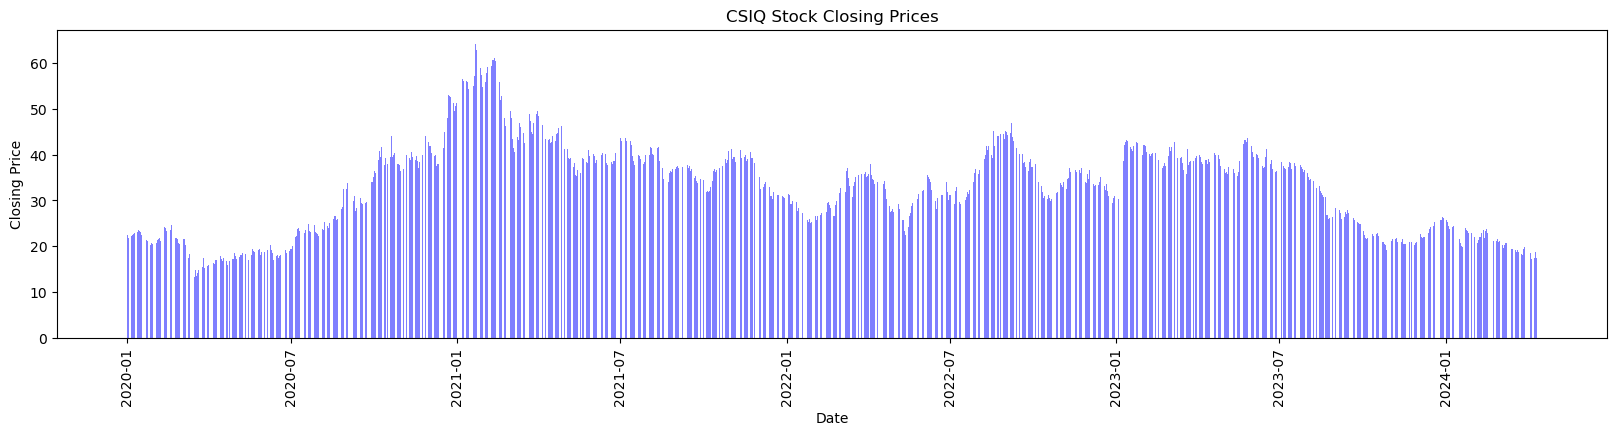

In [92]:

# Plot the DataFrame
# Lesson 07 - Data Visualizations
   
plt.figure(figsize=(20, 4))
plt.bar(csiq_df['Date'], csiq_df["CSIQ_Close"], color='b', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.title('CSIQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


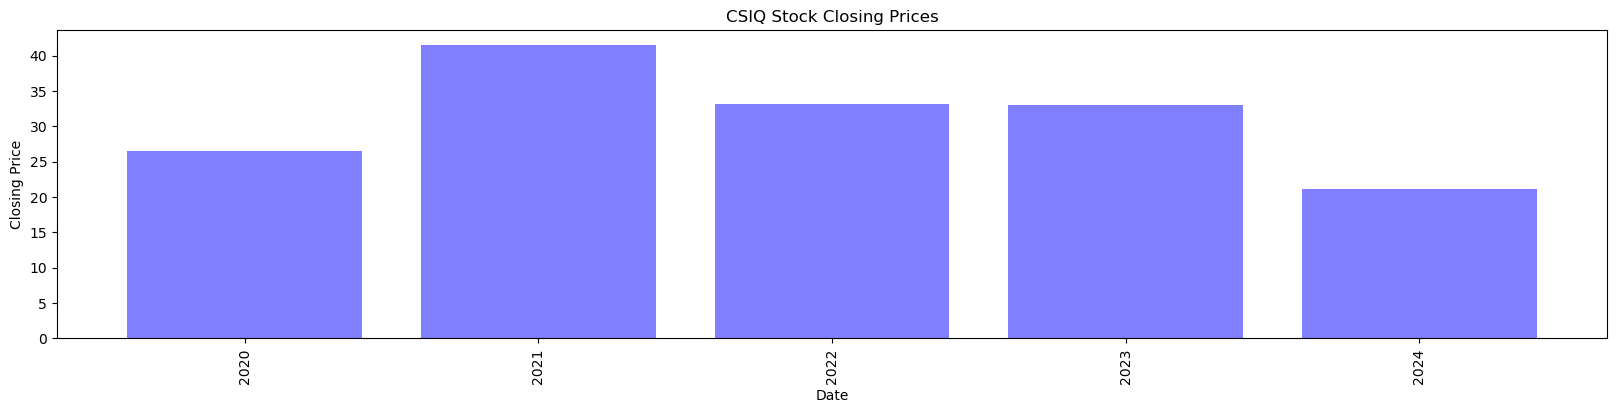

In [95]:
# Converting the Date column from daily to yearly.

csiq_df['Date'] = pd.to_datetime(csiq_df['Date'])

csiq_df['Year'] = csiq_df['Date'].dt.year

average_price_by_year = csiq_df.groupby('Year')['CSIQ_Close'].mean()

# # Set x axis and tick locations
tick_locations = range(len(average_price_by_year))

x_labels = [str(year) for year in average_price_by_year.index]

plt.figure(figsize=(20, 4))

plt.bar(x_labels, average_price_by_year, color='b', alpha=0.5, align="center")

plt.xticks(rotation="vertical")
plt.title('CSIQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()
